In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import pylab as py 
import numpy as np
from sklearn.linear_model import LinearRegression
import researchpy as rp

In [3]:
# Import data
student_perform = pd.read_csv("StudentsPerformance.csv")

In [4]:
# Home task: 
# explore whether there are any dependences between reading/writing/math_scores
# and 
# find out whether student's race or/and paretns' level_of_education influences lunch_type of their children
# and 
# attach all proving plots

In [5]:
# See data
student_perform.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Make colnames look good
student_perform.columns = [x.replace(" ", "_") for x in student_perform.columns]
student_perform.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
scores = [i for i in list(student_perform) if "score" in i]

In [8]:
# Just markes
student_perform.filter(like="score")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


In [9]:
# Shapiro tests for data
# P-values are small, so we can't reject the null-hypothesis
score = student_perform.filter(like="score")
print(stats.shapiro(score[['math_score']]))
print(stats.shapiro(score[['reading_score']]))
print(stats.shapiro(score[['writing_score']]))

(0.9931505918502808, 0.00014530023327097297)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


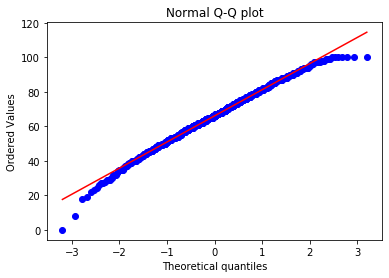

In [10]:
# Additional qq plot,cause there is a lot of rows in df, so shapiro test isn't enough
stats.probplot(score.math_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

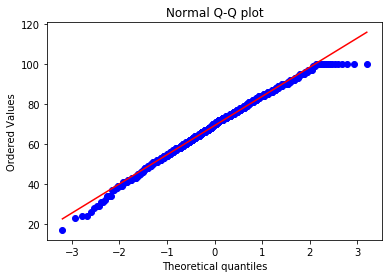

In [11]:
# Data looks like normal
stats.probplot(score.reading_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

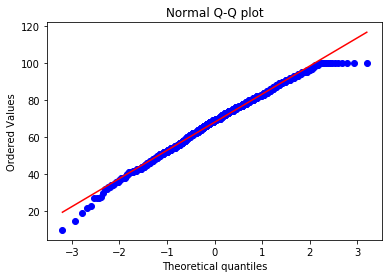

In [12]:
# Data looks like normal
stats.probplot(score.writing_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


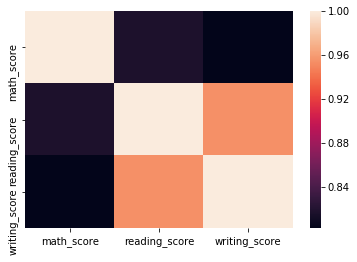

In [13]:
# Pearson correlations between markes
# Wee can see a high correlation between reading and writing
print(student_perform.filter(like="score").corr())
sns.heatmap(student_perform.filter(like="score").corr())

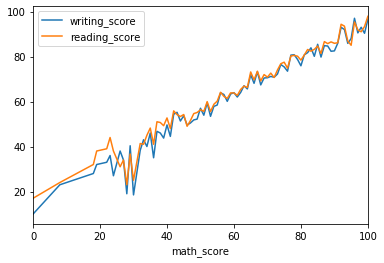

In [14]:
# Let's see a graph. Also writing and reading scores look similar
# If student has high score in math - he also has high score in other subjects (but there is a 'fluctuation' between 20 and 40)
math = student_perform.groupby(['math_score'])\
    .aggregate({'writing_score': 'mean', 'reading_score': 'mean'})
math.plot.line()

In [15]:
#Assumpyions for linear regression:
#Linear relationship - will check
#Multivariate normality - data has normal distribution
#No or little multicollinearity
#No auto-correlation
#Homoscedasticity

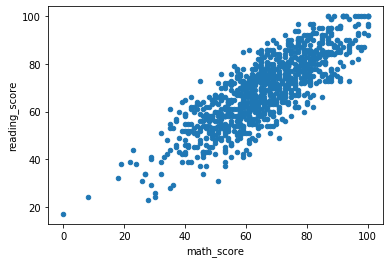

In [16]:
# Let's explore graphs. Looks like linear, but not enough
student_perform.plot.scatter(x='math_score', y='reading_score')

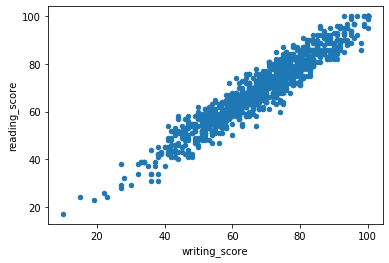

In [17]:
# Due to high correlation between reading and writing scores - looks like a good linear dependance
student_perform.plot.scatter(x='writing_score', y='reading_score')

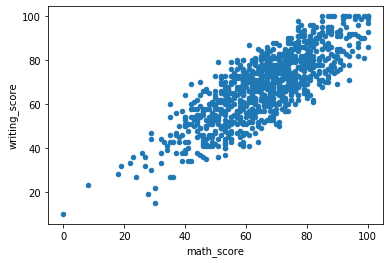

In [18]:
# The same as in the first case
student_perform.plot.scatter(x='math_score', y='writing_score')

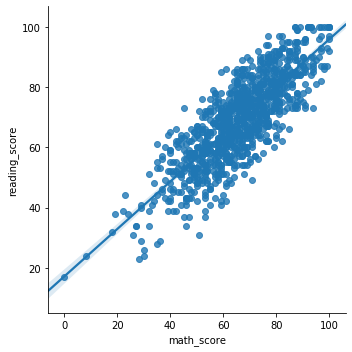

In [19]:
sns.lmplot(x='math_score', y='reading_score', data=student_perform) 

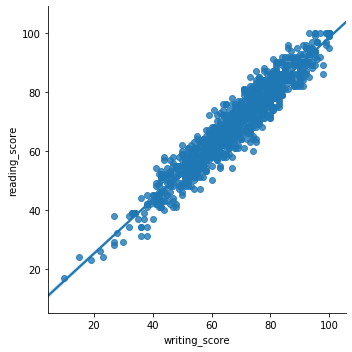

In [20]:
# We can see linear dependence 
sns.lmplot(x='writing_score', y='reading_score', data=student_perform) 

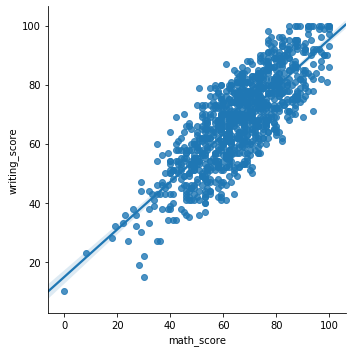

In [21]:
sns.lmplot(x='math_score', y='writing_score', data=student_perform) 

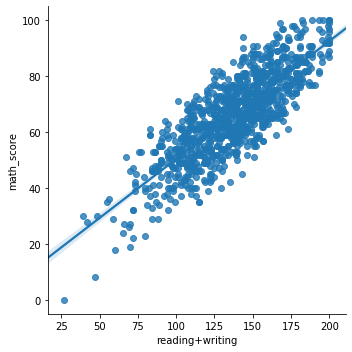

In [22]:
student_perform['reading+writing'] = student_perform['reading_score'] + student_perform['writing_score']
sns.lmplot(x='reading+writing', y='math_score', data=student_perform)

In [23]:
# R^2 isn't good enough, so i decided not to make a prediction
model = LinearRegression().fit(np.array(score.math_score).reshape(-1, 1), np.array(score.writing_score))
r_sq = model.score(np.array(score.math_score).reshape(-1, 1), np.array(score.writing_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6442342539264932
intercept: 14.894224270018505
slope: [0.80436647]


In [24]:
# The same
model = LinearRegression().fit(np.array(score.math_score).reshape(-1, 1), np.array(score.reading_score))
r_sq = model.score(np.array(score.math_score).reshape(-1, 1), np.array(score.reading_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6684365064501091
intercept: 17.141806785685283
slope: [0.78722924]


In [25]:
# The good one
model = LinearRegression().fit(np.array(score.writing_score).reshape(-1, 1), np.array(score.reading_score))
r_sq = model.score(np.array(score.writing_score).reshape(-1, 1), np.array(score.reading_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9112574888913136
intercept: 6.7505047358757295
slope: [0.91719069]


In [26]:
# So let's make a prediction
y_pred = model.predict(np.array(score.writing_score).reshape(-1, 1))
print(y_pred[0:10])
print(np.array(score.writing_score)[0:10])

[74.62261585 87.46328552 92.04923897 47.10689513 75.53980654 78.29137861
 91.13204828 42.52094167 68.20228101 52.61003927]
[74 88 93 44 75 78 92 39 67 50]


In [27]:
# To see all needed parameters for the second task
parents = student_perform.groupby(["parental_level_of_education", "lunch", "race/ethnicity"]).count()
parents.head(20)

gender  \
parental_level_of_education lunch        race/ethnicity           
associate's degree          free/reduced group A              7   
                                         group B             14   
                                         group C             22   
                                         group D             21   
                                         group E             13   
                            standard     group A              7   
                                         group B             27   
                                         group C             56   
                                         group D             29   
                                         group E             26   
bachelor's degree           free/reduced group A              2   
                                         group B              9   
                                         group C             15   
                                         group D             14   
                                         group E              4   
                            standard     group A             10   
                                         group B             11   
                                         group C             25   
                                         group D             14   
                                         group E             14   

                                                         test_preparation_course  \
parental_level_of_education lunch        race/ethnicity                            
associate's degree          free/reduced group A                               7   
                                         group B                              14   
                                         group C                              22   
                                         group D                              21   
                                         group E                              13   
                            standard     group A                               7   
                                         group B                              27   
                                         group C                              56   
                                         group D                              29   
                                         group E                              26   
bachelor's degree           free/reduced group A                               2   
                                         group B                               9   
                                         group C                              15   
                                         group D                              14   
                                         group E                               4   
                            standard     group A                              10   
                                         group B                              11   
                                         group C                              25   
                                         group D                              14   
                                         group E                              14   

                                                         math_score  \
parental_level_of_education lunch        race/ethnicity               
associate's degree          free/reduced group A                  7   
                                         group B                 14   
                                         group C                 22   
                                         group D                 21   
                                         group E                 13   
                            standard     group A                  7   
                                         group B                 27   
                                         group C                 56   
                       

In [29]:
parents = student_perform.groupby(["lunch", "parental_level_of_education", "race/ethnicity"]).count()
parents = parents[["gender"]]
parents = parents.rename(columns={"gender": "count"})
parents

count
lunch        parental_level_of_education race/ethnicity       
free/reduced associate's degree          group A             7
                                         group B            14
                                         group C            22
                                         group D            21
                                         group E            13
             bachelor's degree           group A             2
                                         group B             9
                                         group C            15
                                         group D            14
                                         group E             4
             high school                 group A             7
                                         group B            16
                                         group C            23
                                         group D            16
                                         group E             8
             master's degree             group A             2
                                         group B             4
                                         group C            10
                                         group D             5
                                         group E             3
             some college                group A             7
                                         group B            16
                                         group C            23
                                         group D            26
                                         group E             7
             some high school            group A            11
                                         group B            10
                                         group C            21
                                         group D            13
                                         group E             6
standard     associate's degree          group A             7
                                         group B            27
                                         group C            56
                                         group D            29
                                         group E            26
             bachelor's degree           group A            10
                                         group B            11
                                         group C            25
                                         group D            14
                                         group E            14
             high school                 group A            11
                                         group B            32
                                         group C            41
                                         group D            28
                                         group E            14
             master's degree             group A             1
                                         group B             2
                                         group C             9
                                         group D            18
                                         group E             5
             some college                group A            11
                                         group B            21
                                         group C            46
                                         group D            41
                                         group E            28
             some high school            group A            13
                                         group B            28
                                         group C            28
                                         group D            37
                                         group E            12

In [30]:
parents10 = parents.reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D5EDD9208>]],
      dtype=object)

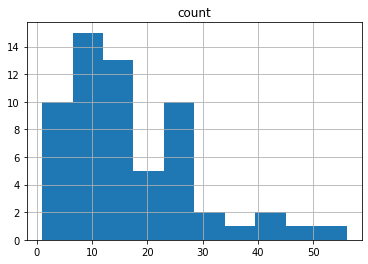

In [31]:
# Isn't normal distributed
parents10.hist()

In [44]:
# Chi-square
# P-value is large - we can see a dependence
xpected=[16.6667]*60
obs = parents10['count'].tolist()
stats.chisquare(obs, expected)

Power_divergenceResult(statistic=493.87901224597556, pvalue=6.07996772420111e-70)

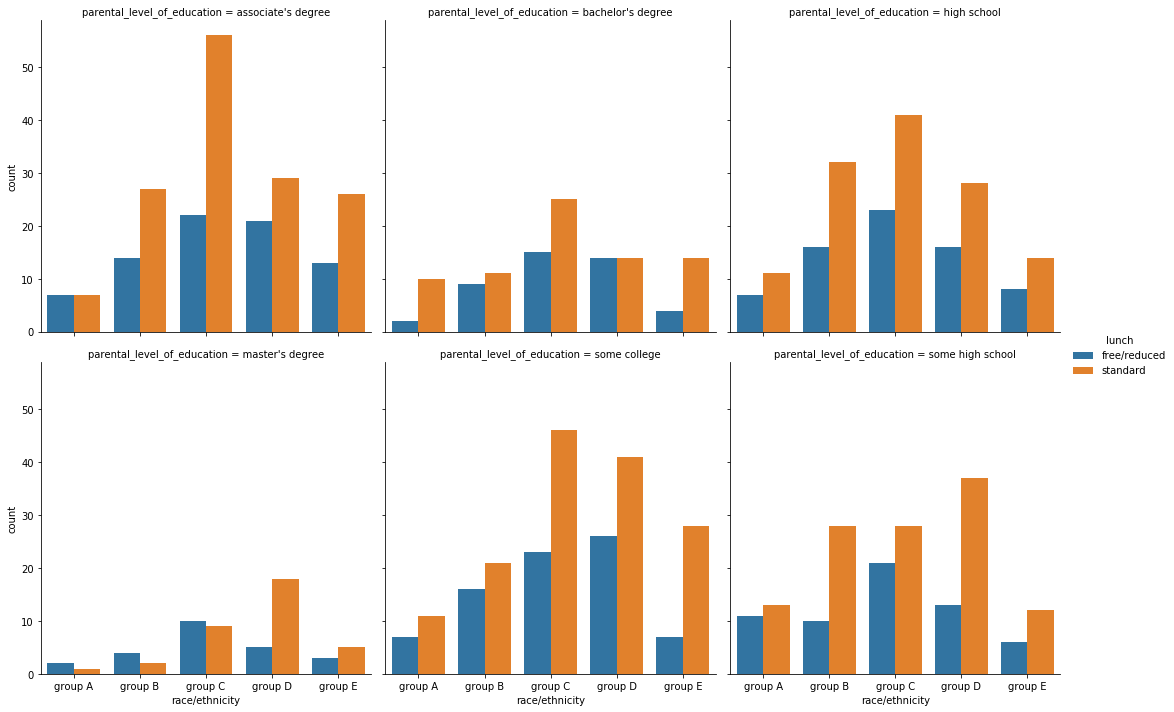

In [36]:
# Okay, when we have a plot - we can see that parents with associate's degree and race C 
#prefer standart lunch for their children.
# Also parents with high scool education and race C and D also prefer standart lunch like parents
# from group C, D and E and college education and from group D and with some high school education
sns.catplot(x='race/ethnicity', y='count', hue = 'lunch', col="parental_level_of_education", col_wrap=3, 
            kind="bar", data=parents.reset_index())